<a href="https://colab.research.google.com/github/Machocho254/Mental_Heath_Analysis/blob/master/Ken_W5_Group__Project_2019_11_B5_Group_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mental Health Review and Analysis

##Requirement
Analyze the dataset below to determine:


*   Which social economic risk factors are associated with depression patients in Kenya?
*   Which demographic category in Kenya faces a  high risk of depression

###Data

Datasets below provided
*train set: https://drive.google.com/open?id=1xk-91FQpKnjwKkRT62LVnnoH0o5EnbfCr4dsS4HESYc

##Importing Essential Libraries

In [0]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical Processing on arrays and matrices
import matplotlib.pyplot as plt #Generating visualizations
import seaborn as sns #Visualizations based on matplot lib

##Data Loading

In [0]:
#Import Dataset. Downloaded the content from URL above then uploaded onto the notebook.
url ='/content/train.csv'
df_mental = pd.read_csv(url)
df_mental.iloc[:10]

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,4.0,378.832920,526.671080,196.98904,24.023054,49.647648,0.0,0,289.173520,36.434967,0.0,0.000000,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.000000,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.500000,1.500000,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.671880,8.260629,173.52654,19.218445,0.000000,0.5,0,173.010990,0.870168,0.0,0.000000,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.000000,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.250000,0.500000,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.750000,1.750000,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3
5,483,25,08-Sep-61,1,35.0,1,6,8,10,6,8.0,63.790752,359.374660,73.67070,0.000000,0.000000,1.7,0,40.938339,2.268844,NaN,5.582501,0.000000,0.000000,2.669228,3.069613,11.531066,0,1,0,1,0,4.804611,4.804611,2.268844,0.189070,0.000000,4.993681,7.5,3.0,7.5,0.0,1.0,1.0,1.0,1.601537,NaN,NaN,0.125000,0.000000,1.000000,0.875000,0.0,1,1,NaN,32.030739,6.406148,0.800000,0.000000,1.50,0,0,444.25610,7.662910,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,6
6,849,130,31-Oct-61,0,34.0,0,1,3,9,1,3.0,60.614365,4.130314,219.25041,0.000000,0.000000,1.0,0,48.963181,0.266923,0.0,0.000000,0.160154,0.160154,0.533846,0.066731,10.890451,0,0,0,0,0,0.000000,0.000000,0.266923,0.022244,0.000000,0.022244,20.0,3.0,20.0,0.0,1.0,0.0,1.0,0.053385,NaN,0.160154,1.000000,1.000000,0.333333,0.000000,0.0,1,1,NaN,6.406148,6.406148,1.000000,0.000000,1.00,0,0,225.62288,0.556089,0,0.0,0,0.000000,0.000000,0,0.000000,0,1,3

In [0]:
#Check number of rows and columns
df_mental.shape

(1143, 75)

In [0]:
df_mental = df_mental.sort_values( by ='surveyid',ascending = True)

In [0]:
df_mental.head(5)

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
1137,1,1,25-Nov-61,1,33.0,1,1,3,14,1,3.0,199.27008,387.603700,1794.52220,32.030739,2242.1519,0.0,0,92.925369,7.473839,0.0,0.0,2.402306,2.402306,0.000000,25.784746,77.994850,0,0,0,0,0,0.000000,0.000000,9.342299,29.317024,0.000000,33.320869,1.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,2.402306,0.333333,1.0,1.0,0.000000,1.0,1,1,NaN,0.000000,0.000000,0.0,0.0,NaN,1,0,3213.51560,2275.472700,0,0.0,0,0.0,0.0,1,0.0,0,0,0
55,2,1,11-Sep-61,1,19.0,1,2,4,6,2,4.0,181.02325,4.130314,133.72833,0.000000,0.0000,0.1,0,136.073460,5.765533,0.0,0.0,0.000000,0.000000,0.000000,2.669228,42.280579,1,0,0,1,0,30.749510,0.000000,2.402306,2.135383,2.402306,5.338456,7.5,0.0,7.5,0.0,4.0,0.0,0.0,NaN,NaN,0.800768,0.250000,0.5,1.0,0.000000,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,187.50629,5.338457,0,0.0,0,0.0,0.0,0,0.0,0,0,2
611,3,1,07-Sep-60,0,27.0,1,0,2,10,0,2.0,228.47450,33.042515,244.55470,80.076851,0.0000,0.0,0,195.736420,27.786667,0.0,0.0,1.441383,NaN,0.734038,2.535767,28.026897,0,0,1,1,0,71.268394,20.819981,13.813256,6.252667,10.343260,27.072647,0.0,0.0,NaN,NaN,2.0,1.0,0.0,0.720692,0.480461,NaN,1.000000,NaN,1.0,5.000000,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,320.35825,27.806684,0,0.0,0,0.0,0.0,0,0.0,1,0,4
629,4,1,25-Jul-60,1,26.0,1,2,4,10,2,4.0,300.40448,0.000000,104.90067,1.601537,0.0000,0.0,0,104.322980,0.000000,0.0,0.0,133.728330,3.203074,0.000000,2.936151,59.417023,1,0,0,1,0,0.000000,24.023054,0.000000,0.000000,0.000000,24.023054,3.0,0.0,0.0,0.0,2.0,0.0,0.0,40.639000,4.003842,3.203074,1.000000,1.0,1.0,8.000000,1.0,1,1,NaN,0.000000,0.000000,0.0,0.0,NaN,1,0,111.30682,24.023054,0,0.0,0,0.0,0.0,0,0.0,1,0,2
1043,5,1,29-Oct-61,1,23.0,1,4,6,10,4,6.0,470.46863,270.908420,305.57327,0.000000,0.0000,0.0,0,380.889310,59.630558,0.0,0.0,0.000000,0.000000,0.800768,21.353827,67.424706,1,0,0,0,0,0.000000,0.000000,2.135383,6.050251,2.001921,20.464085,20.0,3.0,0.0,0.0,2.0,0.0,0.0,4.964765,12.011527,3.042920,1.000000,1.0,1.0,2.833333,1.0,1,1,NaN,9.609222,3.203074,1.0,11.0,0.0,1,0,642.46497,21.264853,0,0.0,0,0.0,0.0,0,0.0,0,0,1


In [0]:
#Display Sample records to validate records successfully imported 
pd.set_option('display.max_rows', 500)

##Data Understanding

###Data Structure 
Exploration of:
- Dataset information. To check total counts per column, not null constraints and data types
- Dataset description. 
- Distinct values per column to identify categorical values
- Null values per column to identify missing values


In [0]:
#Dataframe Information to check data types, not null constraints
print(df_mental.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 1137 to 608
Data columns (total 75 columns):
surveyid                   1143 non-null int64
village                    1143 non-null int64
survey_date                1143 non-null object
femaleres                  1143 non-null int64
age                        1143 non-null float64
married                    1143 non-null int64
children                   1143 non-null int64
hhsize                     1143 non-null int64
edu                        1143 non-null int64
hh_children                1143 non-null int64
hh_totalmembers            809 non-null float64
cons_nondurable            1143 non-null float64
asset_livestock            1143 non-null float64
asset_durable              1143 non-null float64
asset_phone                1143 non-null float64
asset_savings              1143 non-null float64
asset_land_owned_total     1143 non-null float64
asset_niceroof             1143 non-null int64
cons_allfood               11

In [0]:
#Descriptive statistics
df_mental.describe()

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,809.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1100.000000,1123.000000,1143.000000,724.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,727.000000,727.000000,809.000000,809.000000,809.000000,450.000000,265.000000,543.000000,809.000000,727.000000,720.000000,809.000000,720.000000,1143.0,1143.0,59.000000,680.000000,680.000000,680.000000,676.000000,572.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,715.927384,76.409449,0.916885,34.537270,0.772528,2.860017,4.869641,8.735783,2.018373,4.906057,128.407607,113.703653,148.571309,19.656758,10.254082,0.926868,0.000875,95.806020,8.323766,1.177717,0.634804,2.690428,1.829645,2.794807,3.647826,21.706431,0.186352,0.247594,0.107612,0.269466,0.032371,34.848492,17.321227,4.516265,1.866727,3.932084,21.414848,4.042870,0.910324,2.899587,0.440853,3.070457,0.274413,0.367120,5.626042,8.051863,3.722442,0.519817,0.496440,0.797353,1.955721,0.695412,1.0,1.0,0.510452,52.934778,18.611665,0.704684,1.355635,0.745047,0.221347,24.356955,288.501084,34.463737,0.015748,0.553462,0.066492,3.564576,3.011114,0.188976,2.269096,0.097988,0.168854,3.295713
std,415.694525,66.788138,0.276176,13.742107,0.419383,1.846946,2.121852,2.867202,2.016702,2.099287,140.159957,239.698375,198.422016,28.053082,79.808523,1.663766,0.029579,114.487290,15.148661,6.740545,2.746150,12.141003,10.923501,8.331795,7.574917,28.397228,0.389561,0.431804,0.310025,0.443877,0.392355,257.963415,100.532226,8.626985,3.506706,12.199986,101.386778,6.246393,2.594545,5.274774,1.678111,2.205131,0.446494,0.482318,10.942463,17.940287,14.641253,0.321305,0.374030,0.330447,3.359077,0.375157,0.0,0.0,0.222380,117.267036,31.555958,0.341665,2.688571,0.837033,0.415336,798.985512,385.345212,134.058379,0.124554,6.489140,0.249249,24.950902,25.840639,0.391661,19.676268,0.297428,0.374787,1.684910
min,1.000000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.00000

In [0]:
#Describer Non Integer variables
df_cat = df_mental.dtypes[df_mental.dtypes == 'object'].index
df_mental[df_cat].describe()

,survey_date
count,1143
unique,180
top,12-Nov-61
freq,20


In [0]:
#Unique values for each column.
for col in list(df_mental):
    print(col)
    print(df_mental[col].unique())


surveyid
[   1    2    3 ... 1427 1428 1429]
village
[  1   2   3   4   5   6   9   7   8  13  12  11  15  17  18  14  19  22
  10  21  27  25  20  28  23  24  30  31  26  29  35  42  16  37  33  41
  48  46  49  36  47  53  39  57  34  43  40  44  60  45  55  50  51  61
  66  63  71  56  73  68  74  72  70  32  67  86  80  52  83  54  69  90
  81  94  97  38  82  76  89 104 105  78  95  77 108  85 101 107  93  99
 100 103 120  92 116 130 132  96 131 129  64  59 136 121  98 143 124 114
 125  88 109 127 148 113 106  65  62 153 156 126 115 144 102 138 159 160
 133 150 142 135 134 117 161 169  75 171 168 173 149 181 176 158  79 111
 174 146 186 137 162  91 187 180 154 164 179 152 195 163 198 141 204 202
 184 210 207 206 167 145 209 216 193 151  84 220 188  87 218 157 205 229
 217 208 219 221 242 203 175 236 237 192 251 172 244 227 118 185 249 189
 233 266 200 211 234 263 239 182 260 267 257 232 112 241 264 265 254 255
 231 201 246 281 190 222 262 252 275 119 123 228 214 283 258 269 215 27

In [0]:
#Unique values for each column.
df_mental.nunique()

surveyid                   1143
village                     241
survey_date                 180
femaleres                     2
age                          99
married                       2
children                     11
hhsize                       12
edu                          18
hh_children                  11
hh_totalmembers              12
cons_nondurable             808
asset_livestock             274
asset_durable               586
asset_phone                  77
asset_savings                80
asset_land_owned_total       61
asset_niceroof                2
cons_allfood                763
cons_ownfood                466
cons_alcohol                 35
cons_tobacco                 36
cons_med_total              102
cons_med_children            65
cons_ed                     263
cons_social                 334
cons_other                  549
ent_wagelabor                 2
ent_ownfarm                   2
ent_business                  2
ent_nonagbusiness             2
ent_empl

In [0]:
df_mental.age

1137    33.0
55      19.0
611     27.0
629     26.0
1043    23.0
        ... 
954     21.0
1087    34.0
858     30.0
819     32.0
608     24.0
Name: age, Length: 1143, dtype: float64

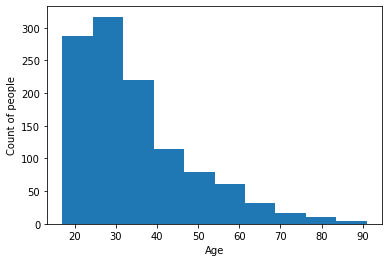

In [0]:
#Age Distribution
h=plt.hist(df_mental['age'], bins =10)
plt.ylabel('Count of people');
plt.xlabel('Age');
plt.show()

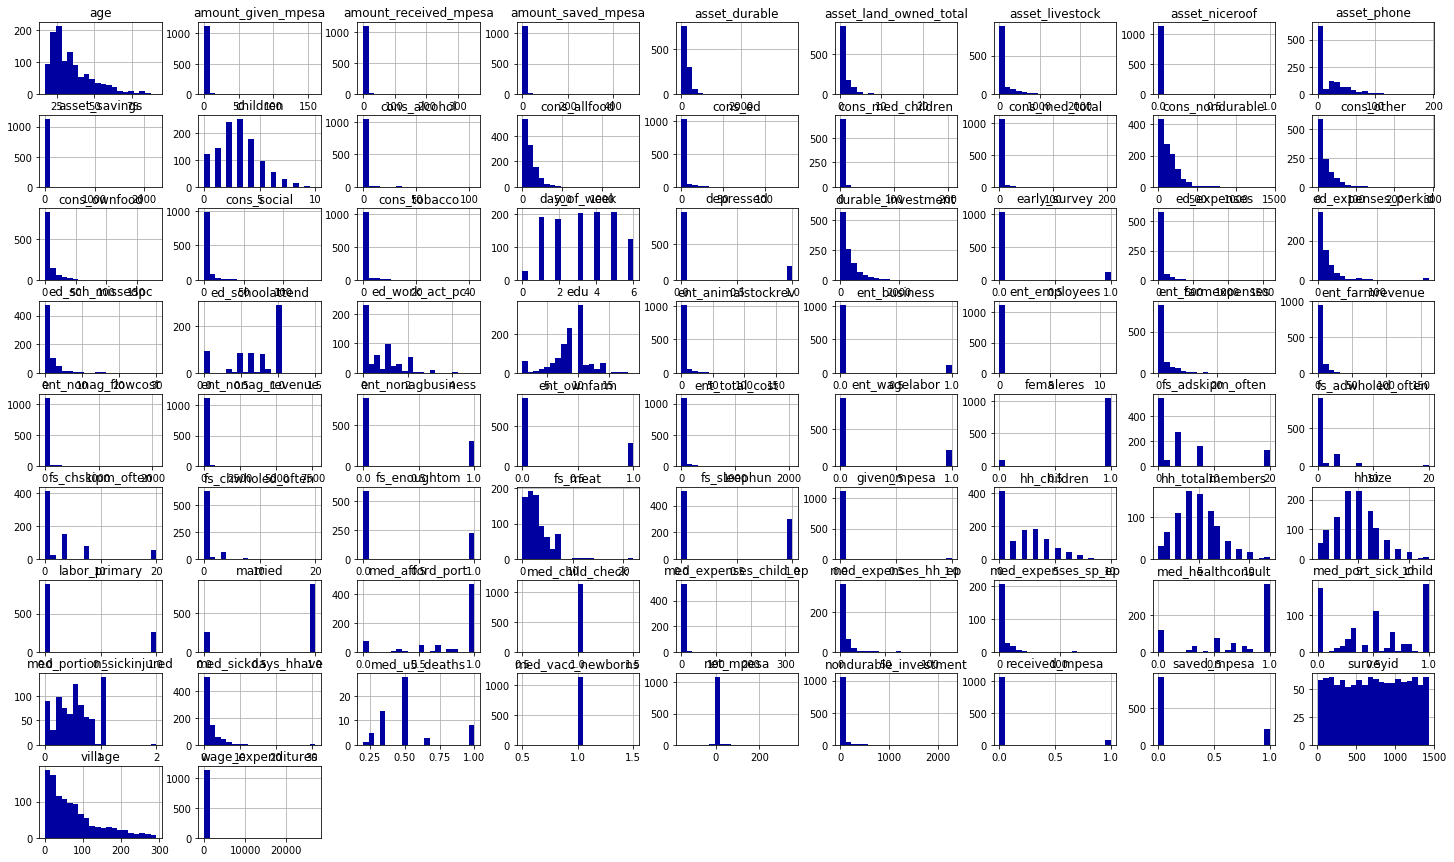

In [0]:
# Distribution
df_mental.hist( bins=20, figsize=(25,15), color='#0000A0', zorder=2, rwidth=10)
plt.show() 

In [0]:
df_mental

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
1137,1,1,25-Nov-61,1,33.0,1,1,3,14,1,3.0,199.270080,387.603700,1794.522200,32.030739,2242.151900,0.00,0,92.925369,7.473839,0.0,0.0,2.402306,2.402306,0.000000,25.784746,77.994850,0,0,0,0,0,0.000000,0.000000,9.342299,29.317024,0.000000,33.320869,1.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,2.402306,0.333333,1.000000,1.0,0.000000,1.000000,1,1,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1,0,3213.51560,2275.472700,0,0.0,0,0.0,0.0,1,0.0,0,0,0
55,2,1,11-Sep-61,1,19.0,1,2,4,6,2,4.0,181.023250,4.130314,133.728330,0.000000,0.000000,0.10,0,136.073460,5.765533,0.0,0.0,0.000000,0.000000,0.000000,2.669228,42.280579,1,0,0,1,0,30.749510,0.000000,2.402306,2.135383,2.402306,5.338456,7.5,0.0,7.5,0.0,4.0,0.0,0.0,NaN,NaN,0.800768,0.250000,0.500000,1.0,0.000000,1.000000,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,187.50629,5.338457,0,0.0,0,0.0,0.0,0,0.0,0,0,2
611,3,1,07-Sep-60,0,27.0,1,0,2,10,0,2.0,228.474500,33.042515,244.554700,80.076851,0.000000,0.00,0,195.736420,27.786667,0.0,0.0,1.441383,NaN,0.734038,2.535767,28.026897,0,0,1,1,0,71.268394,20.819981,13.813256,6.252667,10.343260,27.072647,0.0,0.0,NaN,NaN,2.0,1.0,0.0,0.720692,0.480461,NaN,1.000000,NaN,1.0,5.000000,1.000000,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,320.35825,27.806684,0,0.0,0,0.0,0.0,0,0.0,1,0,4
629,4,1,25-Jul-60,1,26.0,1,2,4,10,2,4.0,300.404480,0.000000,104.900670,1.601537,0.000000,0.00,0,104.322980,0.000000,0.0,0.0,133.728330,3.203074,0.000000,2.936151,59.417023,1,0,0,1,0,0.000000,24.023054,0.000000,0.000000,0.000000,24.023054,3.0,0.0,0.0,0.0,2.0,0.0,0.0,40.639000,4.003842,3.203074,1.000000,1.000000,1.0,8.000000,1.000000,1,1,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1,0,111.30682,24.023054,0,0.0,0,0.0,0.0,0,0.0,1,0,2
1043,5,1,29-Oct-61,1,23.0,1,4,6,10,4,6.0,470.468630,270.908420,305.573270,0.000000,0.000000,0.00,0,380.889310,59.630558,0.0,0.0,0.000000,0.000000,0.800768,21.353827,67.424706,1,0,0,0,0,0.000000,0.000000,2.135383,6.050251,2.001921,20.464085,20.0,3.0,0.0,0.0,2.0,0.0,0.0,4.964765,12.011527,3.042920,1.000000,1.000000,1.0,2.833333,1.000000,1,1,NaN,9.609222,3.203074,1.000000,11.000000,0.000000,1,0,642.46497,21.264853,0,0.0,0,0.0,0.0,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,1424,292,12-Nov-61,1,21.0,1,2,4,9,2,4.0,94.161598,20.651573,97.693756,0.000000,0.000000,1.50,0,54.568939,5.204995,NaN,0.0,0.000000,0.000000,3.042920,20.886711,15.663032,0,0,0,0,0,0.000000,0.000000,2.802690,0.500480,2.402306,4.504323,3.0,0.0,3.0,0.0,5.0,0.0,1.0,2.322229,1.601537,NaN,0.500000,0.000000,1.0,1.750000,1.000000,1,1,0.333333,36.515045,36.515045,1.000000,0.000000,NaN,0,0,127.95455,7.547243,0,0.0,0,0.0,0.0,0,0.0,0,0,1
1087,1425,92,05-Oct-61,1,34.0,1,7,9,6,7,9.0,120.050

Text(0, 0.5, 'Gender')

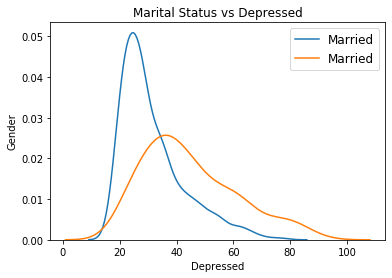

In [0]:
df_mental_married = df_mental[df_mental.married == 1]
sns.distplot(df_mental_married['age'], hist = False, kde = True, label='Married')
df_mental_married = df_mental[df_mental.married == 0]
sns.distplot(df_mental_married['age'], hist = False, kde = True, label='Married')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Marital Status vs Depressed')
plt.xlabel('Depressed')
plt.ylabel('Gender')  

In [0]:
#Null values for each column.
print(df_dep.isnull().sum())

###Correlation

In [0]:
#To find the correlation among the columns using pearson method 
df_mental.corr(method ='pearson') 

In [0]:
corr = df_mental.corr()
sns.heatmap(corr,  square=True)
plt.show()

In [0]:
#Age Correlatition
df_mental['age'].corr(df_mental['depressed'])

In [0]:
from scipy import stats
stats.pointbiserialr(df_mental['depressed'],df_mental['age'])

In [0]:
df_mental['depressed'].sum()

### Distribution

Univariate Distribution

In [0]:
# Distribution
df_dep.hist( bins=20, figsize=(20,16), color='#0000A0', zorder=3, rwidth=5)
plt.show() 

In [0]:
#Check interquartile distribution and outliers of Bluecars by day
bplot=sns.boxplot( x ='xxxx', y= 'day',
                 data=df_autolib, 
                 width=0.5,
                 palette="colorblind")


In [0]:
#Age
fig, ax = plt.subplots() # Create the figure and axes object
# Plot the first x and y axes:
# df_mental.plot(x = df_mental['age'], y = df_mental['depressed'], ax = ax) 
h=plt.hist(y = df_mental['age'], x = df_mental['depressed'], bins =10)

In [0]:
# year = d['YEAR']
# sea_levels = d['CSIRO_SEALEVEL_INCHES']
plt.scatter(x = df_mental['age'], y = df_mental['depressed'], edgecolors='r')
# plt.xlabel('Year')
# plt.ylabel('Sea Level (inches)')
# plt.title('Rise in Sealevel')
plt.show()

In [0]:
plt.bar(df_mental['depressed'],df_mental['age'])

In [0]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df_mental(x = 'age', y='gender', color='purple'))


In [0]:
sns.catplot(x= "depressed", y= df_mental.groupby('femaleres')['depressed'].sum(), hue = "femaleres", data = df_mental)

###Observations

**Observations**
1. 
2.
3.

**Recommendations from observations**
1. 
2. 
3.


 

##Data Preparation

Actions to be done are as per Action items arising from recommendations done during data understanding phase.

Creation of New Columns

a) Column Two

In [0]:
##


b) Column Two

In [0]:
##


##Data Preparation Notes
1. xxx

2. xxx

##Data Analysis

### 1. Gender

In [0]:
#Gender
df_mental.groupby('femaleres')['depressed'].sum()

In [0]:
#Bar chart
df_mental.groupby('femaleres')['depressed'].sum().plot(kind='bar')
plt.show

In [0]:
#Depression per Gender Countplot
ax = sns.countplot(x = 'femaleres', hue = 'depressed', data = df_mental)

In [0]:
# Percentage of gender versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'femaleres',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

### 2. Age

In [0]:
bins = [0,19,26,35,55,65,100]
labels = ['0-18','19-25','26-34','35-54','55-64','65+']
df_mental['age_group'] = pd.cut(df_mental['age'], bins = bins,  labels = labels, right =False)

In [0]:
# df_mental[df_mental['age_group']=='65+']
df_mental.groupby('age_group')['age_group'].count()

In [0]:
#Diagrammatic representation
df_mental.groupby('age_group')['depressed'].sum().plot(kind='bar')
plt.show

In [0]:

df_mental['age_group'].value_counts().plot(kind='bar')

In [0]:
for x in [0,1]:  
    df_mental.age[df_mental.depressed == x].plot(kind="kde")
plt.title("Age with respect to Depression")
plt.legend(("Not Depressed","Depressed"))

In [0]:
ax = sns.countplot(x = 'age_group', hue = 'depressed', data = df_mental)

In [0]:
fig, ax = plt.subplots(figsize = (12,6))

ax = sns.barplot(x = 'age_group',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

#### 3. Marital Status



In [0]:
#Marital status versus depression evaluation
## Count of Married versus Single
print("Total Count of Married and Single Persons")
print(df_mental.groupby('married')['married'].count())

## Count of Married versus Single
print("Depression Count by Marital Status")
print(df_mental.groupby('married')['depressed'].sum())

#Bar chart
print("Bar Graph of Depression by Marital Status")
df_mental.groupby('married')['depressed'].sum().plot(kind='bar')
plt.show

#Countplot of Depression sum by Marital Status 
ax = sns.countplot(x = 'married', hue = 'depressed', data = df_mental)

# Barplot of Percentage of Marital Status versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'married',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

### 4. Children

In [0]:
#Children versus depression evaluation
## Count of Children
print("Total Count of No of children per household")
print(df_mental.groupby('hh_children')['hh_children'].count())

print(df_mental.groupby('hh_children')['depressed'].describe())

## Count of depression by number of children
print("Depression Count by children")
print(df_mental.groupby('hh_children')['depressed'].sum())

#Bar chart
print("Bar Graph of Depression by number of children")
ax = sns.countplot(x="hh_children", hue="depressed", data=df_mental)
plt.show

# Barplot of Percentage of Marital Status versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'hh_children',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

####Education

In [0]:
bins = [0, 9, 13, 20]
labels = ['primary','secondary','tertiary']
df_mental['education_level'] = pd.cut(df_mental['edu'], bins = bins,  labels = labels, right =False)

Total Count of No of years of education
education_level
primary      399
secondary    667
tertiary      77
Name: education_level, dtype: int64
                 count      mean       std  min  25%  50%  75%  max
education_level                                                    
primary          399.0  0.223058  0.416819  0.0  0.0  0.0  0.0  1.0
secondary        667.0  0.139430  0.346655  0.0  0.0  0.0  0.0  1.0
tertiary          77.0  0.142857  0.352222  0.0  0.0  0.0  0.0  1.0
Depression Count by education
education_level
primary      89
secondary    93
tertiary     11
Name: depressed, dtype: int64
Bar Graph of Depression by number of years of education


[Text(0, 0.5, '% Depressed')]

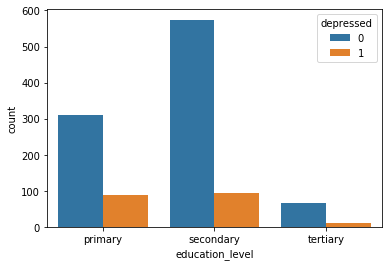

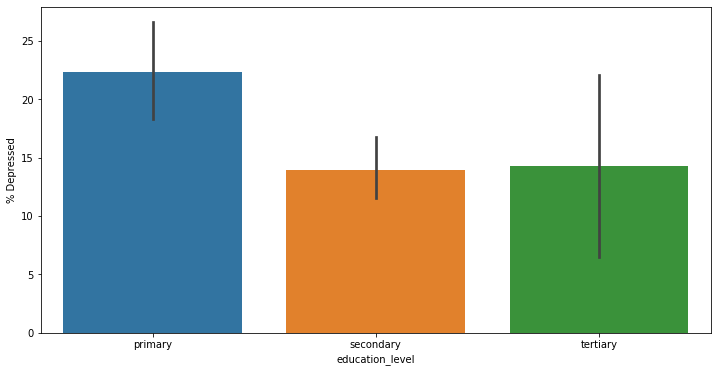

In [0]:
#Education versus depression evaluation
## Count of years of education 
print("Total Count of No of years of education")
print(df_mental.groupby('education_level')['education_level'].count())

print(df_mental.groupby('education_level')['depressed'].describe())

## Count of depression by number of years of education
print("Depression Count by education")
print(df_mental.groupby('education_level')['depressed'].sum())

#Bar chart
print("Bar Graph of Depression by number of years of education")
ax = sns.countplot(x="education_level", hue="depressed", data=df_mental)
plt.show

# Barplot of Percentage of number of years of education versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'education_level',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

####Source of primary income

In [0]:
# Categorize by primary source of income 
for index,row in df_mental.iterrows():
  if row['ent_wagelabor'] == 1:
    df_mental.loc[index,'pri_income'] = 'Wage Labor'
  elif row['ent_ownfarm'] == 1:
    df_mental.loc[index,'pri_income'] = 'Farming'
  elif row['ent_business'] == 1:
    df_mental.loc[index,'pri_income'] = 'Non-agric business'
  else:
    df_mental.loc[index,'pri_income'] = 'Others'

Total Count by Primary source of income
pri_income
Farming               283
Non-agric business    123
Others                524
Wage Labor            213
Name: pri_income, dtype: int64
                    count      mean       std  min  25%  50%  75%  max
pri_income                                                            
Farming             283.0  0.162544  0.369603  0.0  0.0  0.0  0.0  1.0
Non-agric business  123.0  0.146341  0.354894  0.0  0.0  0.0  0.0  1.0
Others              524.0  0.177481  0.382440  0.0  0.0  0.0  0.0  1.0
Wage Labor          213.0  0.169014  0.375647  0.0  0.0  0.0  0.0  1.0
Depression Count by Primary source of income
pri_income
Farming               46
Non-agric business    18
Others                93
Wage Labor            36
Name: depressed, dtype: int64
Bar Graph of Depression by Primary source of income


[Text(0, 0.5, '% Depressed')]

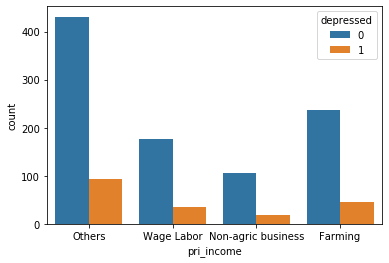

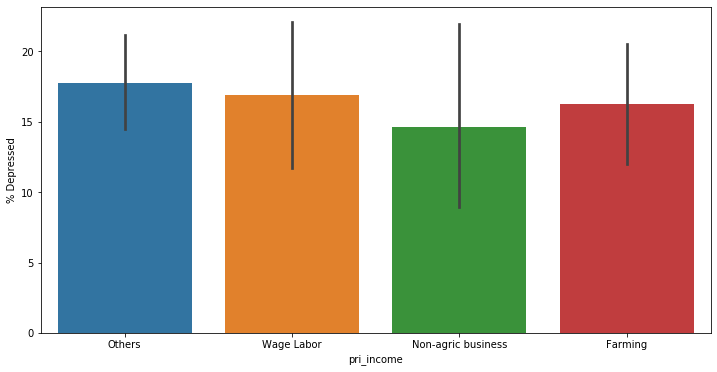

In [0]:
#Primary source of income versus depression evaluation
## Count of Primary source of income 
print("Total Count by Primary source of income")
print(df_mental.groupby('pri_income')['pri_income'].count())

print(df_mental.groupby('pri_income')['depressed'].describe())

## Count of depression by Primary source of income
print("Depression Count by Primary source of income")
print(df_mental.groupby('pri_income')['depressed'].sum())

#Bar chart
print("Bar Graph of Depression by Primary source of income")
ax = sns.countplot(x="pri_income", hue="depressed", data=df_mental)
plt.show

# Barplot of Percentage by Primary source of income versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'pri_income',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

##Evaluation

##

##Recommendation